In [1]:
import law 
import json
import luigi
import os
import ROOT as r
import pickle
import boost_histogram as bh 
import matplotlib.pyplot as plt

import ast
import uproot

from g2Reader import *
from g2Fitter import *

import pickle

infile = "/home/jlab/g-2/omega_a_KS/data/results_clustersAndCoinc_unrandomized_July7_pileup_corrected.root"
histname = "clustersAndCoincidences/corrected"
muLossName = "clustersAndCoincidences/triples"

# ding = g2Histogram(infile, histname, muLossName)
# ding.save("./test_save.pickle")
ding = g2Histogram.read_from_pickle(None, "/home/jlab/g-2/g2fit/g2luigi/tests/test_save.pickle")

Welcome to JupyROOT 6.22/00


/home/jlab/github/g2fit/g2luigi/g2Reader.py:253: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(linthresh=linthresh) #maybe replace with symlognorm?


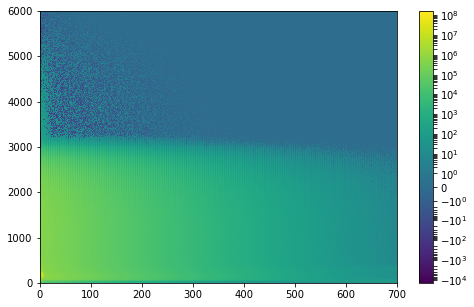

In [2]:
# ding.plothist2d(None, None, True, 1, ding.h_Kloss)
ding.plothist2d([0,1])
plt.colorbar()
plt.show()

In [3]:
li = [i for i in range(10)]
print(li)
print(li[2:3])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[2]


In [5]:
ding.h[0:4692,95:161,1].project(0)

Histogram(Variable(array([0.00000000e+00, 1.49190111e-01, 2.98380222e-01, ...,
       6.99701620e+02, 6.99850810e+02, 7.00000000e+02])), storage=Weight()) # Sum: WeightedSum(value=1.23756e+09, variance=1.57522e+07)

75 161
Sum: WeightedSum(value=3.46574e+08, variance=6.21361e+06)
85 161
Sum: WeightedSum(value=2.62233e+08, variance=5.03228e+06)
95 161
Sum: WeightedSum(value=1.87133e+08, variance=3.91524e+06)
105 161
Sum: WeightedSum(value=1.22435e+08, variance=2.87972e+06)
115 161
Sum: WeightedSum(value=7.08711e+07, variance=1.9577e+06)
125 161
Sum: WeightedSum(value=3.47101e+07, variance=1.19165e+06)
135 161
Sum: WeightedSum(value=1.28306e+07, variance=604665)
145 161
Sum: WeightedSum(value=2.74863e+06, variance=217497)
155 161
Sum: WeightedSum(value=215785, variance=37285.2)


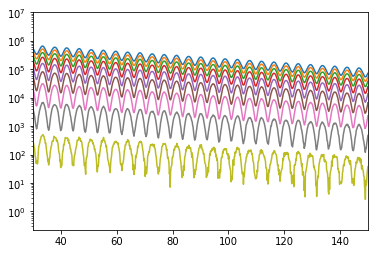

In [6]:
for i in range(75,160,10):
    hi = ding.h[0:4692,i:161:sum,1:2:sum]
    print(i,161)
    print("Sum:", hi.sum())
    plt.plot( hi.axes[0].centers, hi.view().value)
plt.yscale("log")
plt.xlim(30,150)
# plt.ylim(10**6,10**8)
plt.show()

Projecting with: [None, [1500, 3200], [1, 1]] -> [[0, 4692], [75, 161], [0, 1]]
Sum: WeightedSum(value=3.26215e+08, variance=5.99692e+06)
Projecting with: [None, [1700, 3200], [1, 1]] -> [[0, 4692], [85, 161], [0, 1]]
Sum: WeightedSum(value=2.49069e+08, variance=4.85172e+06)
Projecting with: [None, [1900, 3200], [1, 1]] -> [[0, 4692], [95, 161], [0, 1]]
Sum: WeightedSum(value=1.77756e+08, variance=3.75297e+06)
Projecting with: [None, [2100, 3200], [1, 1]] -> [[0, 4692], [105, 161], [0, 1]]
Sum: WeightedSum(value=1.16015e+08, variance=2.7342e+06)
Projecting with: [None, [2300, 3200], [1, 1]] -> [[0, 4692], [115, 161], [0, 1]]
Sum: WeightedSum(value=6.67323e+07, variance=1.82954e+06)
Projecting with: [None, [2500, 3200], [1, 1]] -> [[0, 4692], [125, 161], [0, 1]]
Sum: WeightedSum(value=3.16223e+07, variance=1.07399e+06)
Projecting with: [None, [2700, 3200], [1, 1]] -> [[0, 4692], [135, 161], [0, 1]]
Sum: WeightedSum(value=1.04013e+07, variance=500080)
Projecting with: [None, [2900, 3200]

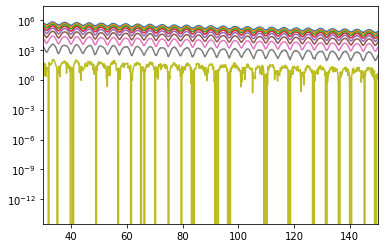

In [7]:
for i in range(1500,3200,200):
    hi = ding.project([0], None, [i,3200], [1,1])
    print("Sum:", hi.sum())
    plt.plot( hi.axes[0].centers, hi.view().value)
plt.yscale("log")
plt.xlim(30,150)
# plt.ylim(10**6,10**8)
plt.show()

Projecting with: [None, [1700, 3200], [1, 1]] -> [[0, 4692], [85, 161], [0, 1]]


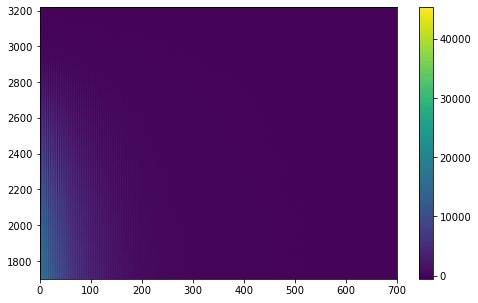

In [8]:
ding.plothist2d(None, None, False, 1, ding.project([0,1], None, [1700,3200], [1,1]) )
plt.colorbar()
plt.show()